In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression, ElasticNet, LogisticRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import os
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.feature_selection import SelectKBest, f_regression, chi2, RFE

%matplotlib inline

In [ ]:
#Reading the dataFile
df =pd.read_csv('CASE1201.ASC.txt', sep=' ', skipinitialspace=True)

In [ ]:
df.head()

,state,sat,takers,income,years,public,expend,rank
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5


In [ ]:
df.shape

(50, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   50 non-null     object 
 1   sat     50 non-null     int64  
 2   takers  50 non-null     int64  
 3   income  50 non-null     int64  
 4   years   50 non-null     float64
 5   public  50 non-null     float64
 6   expend  50 non-null     float64
 7   rank    50 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.2+ KB


In [ ]:
df.describe()

,sat,takers,income,years,public,expend,rank
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,947.940000,26.220000,293.980000,16.209200,81.204000,22.965600,79.988000
std,70.856397,22.022521,43.693034,0.699982,9.830917,6.144932,6.523072
min,790.000000,2.000000,208.000000,14.390000,44.800000,13.840000,69.800000
25%,889.250000,6.250000,261.500000,15.910000,76.925000,19.592500,74.025000
50%,966.000000,16.000000,295.000000,16.360000,80.800000,21.610000,80.850000
75%,998.500000,47.750000,325.000000,16.757500,88.250000,26.387500,85.825000
max,1088.000000,69.000000,401.000000,17.410000,97.000000,50.100000,90.600000


<ipython-input-39-571672c547f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot = True);


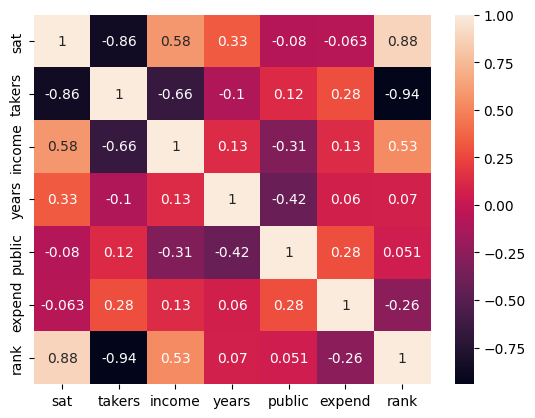

In [ ]:
sns.heatmap(df.corr(method='pearson'), annot = True);

plt.show()

In [ ]:
y = df.iloc[:, 1].values.reshape(-1,1)

In [ ]:
X1=sm.add_constant(df.iloc[:,2].values)
foo=pd.DataFrame(X1)
foo.head()

,0,1
0,1.0,3.0
1,1.0,2.0
2,1.0,3.0
3,1.0,5.0
4,1.0,5.0


In [ ]:
X2=sm.add_constant(df.iloc[:, 2:].values)
X2[:10]

array([[  1.  ,   3.  , 326.  ,  16.79,  87.8 ,  25.6 ,  89.7 ],
       [  1.  ,   2.  , 264.  ,  16.07,  86.2 ,  19.95,  90.6 ],
       [  1.  ,   3.  , 317.  ,  16.57,  88.3 ,  20.62,  89.8 ],
       [  1.  ,   5.  , 338.  ,  16.3 ,  83.9 ,  27.14,  86.3 ],
       [  1.  ,   5.  , 293.  ,  17.25,  83.6 ,  21.05,  88.5 ],
       [  1.  ,   8.  , 263.  ,  15.91,  93.7 ,  29.48,  86.4 ],
       [  1.  ,   7.  , 343.  ,  17.41,  78.3 ,  24.84,  83.4 ],
       [  1.  ,   4.  , 333.  ,  16.57,  75.2 ,  17.42,  85.9 ],
       [  1.  ,   5.  , 328.  ,  16.01,  97.  ,  25.96,  87.5 ],
       [  1.  ,  10.  , 304.  ,  16.85,  77.3 ,  27.69,  84.2 ]])

In [ ]:
model1 = sm.OLS(y,X1).fit()
model1.summary(xname=['intercept','takers'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     133.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.77e-15
Time:                        04:31:03   Log-Likelihood:                -250.19
No. Observations:                  50   AIC:                             504.4
Df Residuals:                      48   BIC:                             508.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1020.3062      8.139    125.359      0.000    1003.941    1036.671
takers        -2.7600      0.239    -11.563      0.000      -3.240      -2.280
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.144
Skew:                          -0.131   Prob(JB):                        0.931
Kurtosis:                       3.011   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print("Simple Linear Regression R2 value:", round(model1.rsquared,2))

Simple Linear Regression R2 value: 0.74


In [ ]:
model2 = sm.OLS(y,X2).fit()
model2.summary(xname=['intercept','takers', 'income', 'years', 'public','expend','rank'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     51.91
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           4.16e-18
Time:                        04:31:15   Log-Likelihood:                -230.74
No. Observations:                  50   AIC:                             475.5
Df Residuals:                      43   BIC:                             488.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -94.6591    211.510     -0.448      0.657    -521.209     331.891
takers        -0.4801      0.694     -0.692      0.493      -1.879       0.919
income        -0.0082      0.152     -0.054      0.957      -0.315       0.299
years         22.6101      6.315      3.581      0.001       9.876      35.345
public        -0.4642      0.579     -0.802      0.427      -1.632       0.704
expend         2.2120      0.846      2.615      0.012       0.506       3.918
rank           8.4762      2.108      4.021      0.000       4.225      12.727
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.957
Skew:                          -0.591   Prob(JB):                        0.228
Kurtosis:                       3.152   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print("Full Linear Regression R2 value:", round(model2.rsquared,2))

Full Linear Regression R2 value: 0.88


In [ ]:
y = df['sat']
X = df.drop(['sat', 'state'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Feature Selection

In [ ]:
#1. Filter Method - SelectKBest

In [ ]:
# Step 1: Initialising the feature selector
selector = SelectKBest(score_func=chi2, k=1)

# Step 2: Fitting the selector to your data
X_selected = selector.fit_transform(X, y)

# Step 3: Printing the best feature or Features
best_feature_index = selector.get_support().argmax()
best_feature_name = X.columns[best_feature_index]

print("Best Feature [Filter]:", best_feature_name)

Best Feature [Filter]: takers


In [ ]:
#2.  Wrapper Method - Recursive Feature Elimination (RFE)

In [ ]:
# Step 1: Initialising the RFE selector with the estimator and desired number of features
rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=1)

# Step 2: Fitting the RFE selector to your training data and transform X_train to select the best feature(s)
X_rfe = rfe_selector.fit_transform(X_train, y_train)

# Step 3: Printing the index of the best feature(s)
best_feature_index = rfe_selector.support_.argmax()

# Step 4: Printing the name(s) of the best feature(s) from X columns
best_feature_name = X_train.columns[best_feature_index]

# Print the best feature(s)
print("Best Feature [Wrapper]:", best_feature_name)


Best Feature [Wrapper]: years


In [ ]:
#3. Embedded Method - Elastic Net

In [ ]:
# Step 1: Initialsing the Elastic Net model with alpha and l1_ratio values
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)

# Step 2: Fitting the Elastic Net model to your training data
elastic_net_model.fit(X_train, y_train)

# Step 3: Printing the feature importances (coefficients) from the trained model
feature_importances_elastic_net = elastic_net_model.coef_

# Step 4: Printing the index of the top feature (highest coefficient)
top_feature_index = feature_importances_elastic_net.argmax()

# Step 5: Printing the name of the top feature from X columns
top_feature_name = X_train.columns[top_feature_index]

# Print the top feature
print("Best Feature [Embedded]:", top_feature_name)

Best Feature [Embedded]: years


This code evaluates the performance of an Elastic Net regression model. It begins by using the trained Elastic Net model to predict target values on a test dataset, storing these predictions in y_pred_elastic_net. Next, it calculates the R-squared (R^2) score, a statistical metric representing the goodness of fit between the predicted and actual target values. The resulting R^2 score, rounded to three decimal places, is then printed as a measure of how well the Elastic Net model captures the variance in the test dataset. A higher R^2 score indicates a better fit between the model's predictions and the observed data, signifying a stronger predictive capability of the model.

In [ ]:
# Making predictions using the Elastic Net model
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Calculating the R-squared (R^2) score for evaluation
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

# Printing the R^2 value rounded to three decimal places
print("R-squared (R^2) score for Embedded Model:", round(r2_elastic_net, 3))


R-squared (R^2) score for Embedded Model: 0.73
